# **[프로젝트] 2019년 ~ 2022년 부산광역시 문화행사 수 분석 및 시각화**


## **1. 프로젝트 기획 배경**
*    일상을 회복을 하고 있는 요즘, 코로나-19 바이러스 확산으로 저조되었던 공연 및 행사의 수가 늘어나고 있습니다. 
*    부산광역시의 코로나-19 바이러스 확산 전후의 문화행사 수를 비교하고자 합니다.


## **2. 프로젝트 내용**



### 2.1 초기설정

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
sns.set(font='NanumGothic',
        rc={"axes.unicode_minus":False},
        style='darkgrid')

## 2.2 데이터 전처리

### 2.2.1 데이터 확인
데이터 출처

*   부산시 연극: https://data.busan.go.kr/dataSet/detail.nm?contentId=10&publicdatapk=15063721
*   부산시 뮤지컬: https://data.busan.go.kr/dataSet/detail.nm?contentId=10&publicdatapk=15063728
*   부산시 클래식: https://data.busan.go.kr/dataSet/detail.nm?contentId=10&publicdatapk=15063730
*   부산시 전시: https://data.busan.go.kr/dataSet/detail.nm?contentId=10&publicdatapk=15063737
*   부산시 콘서트: https://data.busan.go.kr/dataSet/detail.nm?contentId=10&publicdatapk=15063739
*   부산시 무용: https://data.busan.go.kr/dataSet/detail.nm?contentId=10&publicdatapk=15063743
*   부산시 오페라: https://data.busan.go.kr/dataSet/detail.nm?contentId=10&publicdatapk=15063745




In [ ]:
# 데이터 불러오기
busan_play = pd.read_csv("/content/gdrive/MyDrive/ProjectFiles/부산광역시_연극 목록.csv", encoding="euc-kr") 
busan_musical = pd.read_csv("/content/gdrive/MyDrive/ProjectFiles/부산광역시_뮤지컬 목록 서비스.csv", encoding="euc-kr") 
busan_classic = pd.read_csv("/content/gdrive/MyDrive/ProjectFiles/부산광역시_클래식 목록 서비스.csv", encoding="euc-kr") 
busan_exhibition = pd.read_csv("/content/gdrive/MyDrive/ProjectFiles/부산광역시_전시 목록 서비스.csv", encoding="euc-kr") 
busan_concert = pd.read_csv("/content/gdrive/MyDrive/ProjectFiles/부산광역시_콘서트 목록 서비스.csv", encoding="euc-kr") 
busan_dance = pd.read_csv("/content/gdrive/MyDrive/ProjectFiles/부산광역시_무용 목록 서비스.csv", encoding="euc-kr") 
busan_opera = pd.read_csv("/content/gdrive/MyDrive/ProjectFiles/부산광역시_오페라 목록 서비스.csv", encoding="euc-kr") 

In [ ]:
busan_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   공연번호    658 non-null    int64 
 1   제목      658 non-null    object
 2   공연시작일   658 non-null    object
 3   공연종료일   658 non-null    object
 4   오픈런     658 non-null    object
 5   시설명     658 non-null    object
 6   유무료 구분  658 non-null    object
dtypes: int64(1), object(6)
memory usage: 36.1+ KB


In [ ]:
busan_musical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   공연번호    683 non-null    int64 
 1   제목      683 non-null    object
 2   공연시작일   683 non-null    object
 3   공연종료일   683 non-null    object
 4   오픈런     683 non-null    object
 5   시설명     683 non-null    object
 6   유무료 구분  683 non-null    object
dtypes: int64(1), object(6)
memory usage: 37.5+ KB


In [ ]:
busan_classic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   공연번호    1703 non-null   int64 
 1   제목      1703 non-null   object
 2   공연시작일   1703 non-null   object
 3   공연종료일   1703 non-null   object
 4   오픈런     1703 non-null   object
 5   시설명     1703 non-null   object
 6   유무료 구분  1703 non-null   object
dtypes: int64(1), object(6)
memory usage: 93.3+ KB


In [ ]:
busan_exhibition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전시번호    1910 non-null   int64 
 1   제목      1910 non-null   object
 2   전시시작일   1910 non-null   object
 3   전시종료일   1910 non-null   object
 4   오픈런     1910 non-null   object
 5   시설명     1910 non-null   object
 6   유무료 구분  1910 non-null   object
dtypes: int64(1), object(6)
memory usage: 104.6+ KB


In [ ]:
busan_concert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   공연번호    882 non-null    int64 
 1   제목      882 non-null    object
 2   공연시작일   882 non-null    object
 3   공연종료일   882 non-null    object
 4   오픈런     882 non-null    object
 5   시설명     882 non-null    object
 6   유무료 구분  882 non-null    object
dtypes: int64(1), object(6)
memory usage: 48.4+ KB


In [ ]:
busan_dance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시설명     170 non-null    object
 1   공연번호    170 non-null    int64 
 2   제목      170 non-null    object
 3   공연시작일   170 non-null    object
 4   공연종료일   170 non-null    object
 5   오픈런     170 non-null    object
 6   유무료 구분  170 non-null    object
dtypes: int64(1), object(6)
memory usage: 9.4+ KB


In [ ]:
busan_opera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   공연번호    116 non-null    int64 
 1   제목      116 non-null    object
 2   공연시작일   116 non-null    object
 3   공연종료일   116 non-null    object
 4   오픈런     116 non-null    object
 5   시설명     116 non-null    object
 6   유무료 구분  116 non-null    object
dtypes: int64(1), object(6)
memory usage: 6.5+ KB


### 2.2.2 불필요한 데이터 제거

#### 2.2.2.1 불필요한 열 제거


In [ ]:
busan_play1 = busan_play.drop(columns=['오픈런', '유무료 구분', '공연종료일', '공연번호']).copy()
busan_musical1 = busan_musical.drop(columns=['오픈런', '유무료 구분', '공연종료일', '공연번호']).copy()
busan_classic1 = busan_classic.drop(columns=['오픈런', '유무료 구분', '공연종료일', '공연번호']).copy()
busan_exhibition1 = busan_exhibition.drop(columns=['오픈런', '유무료 구분', '전시종료일', '전시번호']).copy()
busan_concert1 = busan_concert.drop(columns=['오픈런', '유무료 구분', '공연종료일', '공연번호']).copy()
busan_dance1 = busan_dance.drop(columns=['오픈런', '유무료 구분', '공연종료일', '공연번호']).copy()
busan_opera1 = busan_opera.drop(columns=['오픈런', '유무료 구분', '공연종료일', '공연번호']).copy()

In [ ]:
busan_play1.tail()

,제목,공연시작일,시설명
653,KF아세안 어린이 공연 시리즈_앵콜［개굴개굴고래고래］,2022-12-07,부산시민회관
654,꺼삐딴 리,2022-11-23,부산예술회관
655,우리동네 홈쇼핑_영도편,2022-12-15,무대공감 소극장
656,원아워,2022-11-30,일터 소극장
657,니 부모 얼굴이 보고싶다,2022-11-24,해운대문화회관


In [ ]:
busan_musical1.tail()

,제목,공연시작일,시설명
678,바라던; 바다,2022-11-12,부산문화회관
679,가족뮤지컬 호두까기인형 - 명지,2022-12-11,성원아트홀
680,가족뮤지컬〈급식왕 - 발가락 떡볶이의 비밀〉,2023-01-14,부산시민회관
681,2022 신 별주부전 창작 뮤지컬［토장군을 찾아라!］,2022-11-23,안데르센극장
682,2022 루돌프와 산타클로스,2022-12-16,부산문화회관


In [ ]:
busan_classic1.tail()

,제목,공연시작일,시설명
1698,"합창과 실내악으로 다시, 손을건네다",2022-11-15,금정문화회관
1699,제798회 금정수요음악회〈라움 트리오 정기연주회〉,2022-11-16,금정문화회관
1700,나의 인간 태양계,2022-11-26,게네랄파우제
1701,Quiet Nights of Stars,2022-11-29,게네랄파우제
1702,우크라이나 체르니우치 필하모니 국제교류음악회,2022-11-20,영화의전당


In [ ]:
busan_exhibition1.tail()

,제목,전시시작일,시설명
1905,전준자 회고전 - 축제,2022-11-11,미광화랑
1906,이건희컬렉션 한국 근현대 미술 특별전《수집: 위대한 여정》,2022-11-11,부산시립미술관
1907,2022 부산학생사진동아리 작품전,2022-11-03,부산학생예술문화회관
1908,최수환 : 하나의 의자 두 개의 기억,2022-11-11,홍티아트센터
1909,回想展 회상전 : 지나간 기억을 걷는 시간,2022-11-16,부산시민공원


In [ ]:
busan_concert1.tail()

,제목,공연시작일,시설명
877,"악성, 베토벤",2022-11-26,게네랄파우제
878,크리스마스 매직쇼,2022-12-03,초록마술극장
879,2022 장민호 단독 콘서트 ‘호시절 : 好時節’’,2022-12-10,KBS 부산홀
880,2022 임창정 전국투어콘서트 ‘Multiverse’,2022-12-31,벡스코 제1전시장
881,2022 뮤지컬 갈라 송년콘서트 in 영도,2022-12-09,영도문화예술회관


In [ ]:
busan_dance1.tail()

,시설명,제목,공연시작일
165,국립부산국악원,수요공감 11-1 - 법장 우한웅의 춤,2022-11-02
166,부산예술회관,소리로 풀어내는 김정원의 춤 나들이,2022-11-30
167,화명생태공원,풍물굿 ART FESTA〈북춤100인무〉,2022-11-19
168,민주공원,백조의호수 - 전통연희와 만나다,2022-11-20
169,부산시민회관,배시시 명품극장 - 춤을 말하다,2022-11-30


In [ ]:
busan_opera1.tail()

,제목,공연시작일,시설명
111,예술의 전당〈영상으로 만나는 ‘마술피리’〉,2022-11-16,영도문화예술회관
112,키즈 오페라 콘서트 - 푸치니 나비부인,2022-11-19,청년창조발전소
113,영화관에서즐기는 오페라동화애니메이션- 베르디 라트라비아타,2022-12-03,메가박스 장산
114,라트라비아타,2022-12-11,영화의전당
115,오페라 라트라비아타,2022-12-09,영화의전당


#### 2.2.2.2 Null값 확인

In [ ]:
busan_play1.isnull().sum()

제목       0
공연시작일    0
시설명      0
dtype: int64

In [ ]:
busan_musical1.isnull().sum()

제목       0
공연시작일    0
시설명      0
dtype: int64

In [ ]:
busan_classic1.isnull().sum()

제목       0
공연시작일    0
시설명      0
dtype: int64

In [ ]:
busan_exhibition1.isnull().sum()

제목       0
전시시작일    0
시설명      0
dtype: int64

In [ ]:
busan_concert1.isnull().sum()

제목       0
공연시작일    0
시설명      0
dtype: int64

In [ ]:
busan_dance1.isnull().sum()

시설명      0
제목       0
공연시작일    0
dtype: int64

In [ ]:
busan_opera1.isnull().sum()

제목       0
공연시작일    0
시설명      0
dtype: int64

#### 2.2.2.3 2019년 ~ 2022년(4개년) 데이터 추출

In [ ]:
# sorted(list(set(busan_play1['공연시작일'])))

In [ ]:
# sorted(list(set(busan_musical1['공연시작일'])))

In [ ]:
def year_selection(data, name):
  temp = data[(data[name].str.startswith('2022'))|(data[name].str.startswith('2021'))|(data[name].str.startswith('2020'))|(data[name].str.startswith('2019'))].copy()
  return temp 

In [ ]:
busan_play2 = year_selection(busan_play1,'공연시작일')
busan_musical2 = year_selection(busan_musical1,'공연시작일')
busan_classic2 = year_selection(busan_classic1,'공연시작일')
busan_exhibition2 = year_selection(busan_exhibition1,'전시시작일')
busan_concert2 = year_selection(busan_concert1,'공연시작일')
busan_dance2 = year_selection(busan_dance1,'공연시작일')
busan_opera2 = year_selection(busan_opera1,'공연시작일')

In [ ]:
# sorted(list(set(busan_opera2['공연시작일'])))

### 2.2.3 데이터 통합

#### 2.2.3.1 열 이름 변경

In [ ]:
# 공연시작일-> 시작일
busan_play2.rename(columns={'공연시작일':'시작일'}, inplace=True)
busan_musical2.rename(columns={'공연시작일':'시작일'}, inplace=True)
busan_opera2.rename(columns={'공연시작일':'시작일'}, inplace=True)
busan_classic2.rename(columns={'공연시작일':'시작일'}, inplace=True)
busan_exhibition2.rename(columns={'전시시작일':'시작일'}, inplace=True)
busan_concert2.rename(columns={'공연시작일':'시작일'}, inplace=True)
busan_dance2.rename(columns={'공연시작일':'시작일'}, inplace=True)

In [ ]:
busan_play2.head()

,제목,시작일,시설명
0,옥탑방고양이 [부산],2020-03-12,BNK부산은행 조은극장
1,여자만세2 [부산],2020-03-19,부산문화회관
2,우리는 친구다 [부산],2020-07-03,부산시민회관
3,우당탕 과학 탐험대 [부산],2020-01-30,해운대문화회관
4,검정고무신 [부산],2019-12-20,에저또소극장 [부산]


In [ ]:
busan_exhibition2.head()

,제목,시작일,시설명
1,Missed connections : 리차드 케네디 (Richard Kennedy)...,2020-02-19,조현화랑
2,자화상ll - 나를보다,2020-02-20,시립미술관
3,새로운 시의 시대,2020-02-20,시립미술관
4,2020 아시아 국제도자교류전,2020-02-16,시립미술관
5,좌혜선 개인전 <971. 855.....500>,2020-02-07,오픈스페이스 배


#### 2.2.3.2 열 속성 추가

In [ ]:
# 분류 속성 추가
busan_play2['분류'] = '연극'
busan_musical2['분류'] = '뮤지컬'
busan_classic2['분류'] = '클래식'
busan_exhibition2['분류'] = '전시'
busan_concert2['분류'] = '콘서트'
busan_dance2['분류'] = '무용'
busan_opera2['분류'] = '오페라'

In [ ]:
busan_concert2.head(20)

,제목,시작일,시설명,분류
0,디에이드 전국투어콘서트 [부산],2020-03-01,부산시민회관,콘서트
1,제141회 concert 재즈 와인에 빠지다,2020-02-28,해운대문화회관,콘서트
2,임한별 단독 부산 콘서트: Agit,2020-02-08,소향씨어터,콘서트
3,엠씨더맥스 데뷔 20주년 콘서트: CEREMONIA [부산],2020-03-28,사직종합운동장,콘서트
4,발렌타인데이콘서트 with 웅산밴드 [부산],2020-02-14,체스154,콘서트
5,적재 콘서트: 어떤 하루 [부산],2020-02-15,(재)영화의전당,콘서트
6,잔나비 전국투어: NONSENSE Ⅱ [부산],2020-03-14,벡스코 (BEXCO),콘서트
7,Select shop concert: 십센치X데이브레이크 [부산],2020-03-14,KBS홀 [부산],콘서트
8,한낮의 유U;콘서트 (1월),2020-01-21,(재)영화의전당,콘서트
9,설 명절 디너쇼,2020-01-26,롯데호텔 [부산],콘서트


#### 2.2.3.3 데이터 병합

In [ ]:
# 전체 데이터 수 확인
busan_play2['분류'].value_counts().sum() + busan_musical2['분류'].value_counts().sum() + busan_classic2['분류'].value_counts().sum() + busan_exhibition2['분류'].value_counts().sum() + busan_concert2['분류'].value_counts().sum() + busan_dance2['분류'].value_counts().sum() + busan_opera2['분류'].value_counts().sum()

5578

In [ ]:
busan = pd.concat([busan_play2, busan_musical2, busan_classic2, busan_exhibition2, busan_concert2, busan_dance2, busan_opera2]).copy().reset_index()
busan = busan.drop(columns = 'index')
busan

,제목,시작일,시설명,분류
0,옥탑방고양이 [부산],2020-03-12,BNK부산은행 조은극장,연극
1,여자만세2 [부산],2020-03-19,부산문화회관,연극
2,우리는 친구다 [부산],2020-07-03,부산시민회관,연극
3,우당탕 과학 탐험대 [부산],2020-01-30,해운대문화회관,연극
4,검정고무신 [부산],2019-12-20,에저또소극장 [부산],연극
...,...,...,...,...
5573,예술의 전당〈영상으로 만나는 ‘마술피리’〉,2022-11-16,영도문화예술회관,오페라
5574,키즈 오페라 콘서트 - 푸치니 나비부인,2022-11-19,청년창조발전소,오페라
5575,영화관에서즐기는 오페라동화애니메이션- 베르디 라트라비아타,2022-12-03,메가박스 장산,오페라
5576,라트라비아타,2022-12-11,영화의전당,오페라


In [ ]:
sorted(list(set(busan['분류'])))

['무용', '뮤지컬', '연극', '오페라', '전시', '콘서트', '클래식']

In [ ]:
busan.groupby(['분류']).count()['제목']

분류
무용      170
뮤지컬     502
연극      493
오페라     116
전시     1905
콘서트     793
클래식    1599
Name: 제목, dtype: int64

### 2.2.4 월별 항목 추가

In [ ]:
busan_month = busan.copy()
busan_month['시작월'] = ''

In [ ]:
# 연도 및 월 데이터 추출
for i in range(len(busan)):
  year = busan['시작일'][i].split('-')[0]
  month = busan['시작일'][i].split('-')[1]
  busan_month['시작월'][i] = year+'년'+month+'월'

In [ ]:
busan_month.tail(20)

,제목,시작일,시설명,분류,시작월
5558,베르디 오페라 AIDA 하이라이트,2022-09-01,영도문화예술회관,오페라,2022년09월
5559,유럽극장 주역가수들과 함께하는 모차르트 갈라 콘서트,2022-08-20,부산문화회관,오페라,2022년08월
5560,영화관에서즐기는오페라동화애니메이션 - 로시니 세비야의이발사,2022-10-01,메가박스 장산,오페라,2022년10월
5561,키즈 오페라 콘서트 - 바그너 라인의 황금,2022-09-17,청년창조발전소,오페라,2022년09월
5562,라 보엠,2022-10-01,부산문화회관,오페라,2022년10월
5563,오페라 손양원,2022-09-23,부전교회 이음홀,오페라,2022년09월
5564,모차르트의〈마술피리〉,2022-10-27,금정문화회관,오페라,2022년10월
5565,뻔하지 않고 대단히 Fun한 세계 오페라 아리아 페스티벌,2022-09-20,금정문화회관,오페라,2022년09월
5566,소호오페라 코리아 “피가로의 결혼”,2022-10-05,부산문화회관,오페라,2022년10월
5567,키즈 오페라 콘서트 - 푸치니 나비부인,2022-10-15,청년창조발전소,오페라,2022년10월


## 2.3 데이터 시각화

### 2.3.1 연도별 공연/행사 수 시각화

In [ ]:
# 연도별로 추출한 후, 월별로 분류 데이터 수 계산
busan_2019 = busan_month[busan_month['시작월'].str.startswith('2019')].copy().groupby(['시작월']).count()['분류']
busan_2020 = busan_month[busan_month['시작월'].str.startswith('2020')].copy().groupby(['시작월']).count()['분류']
busan_2021 = busan_month[busan_month['시작월'].str.startswith('2021')].copy().groupby(['시작월']).count()['분류']
busan_2022 = busan_month[busan_month['시작월'].str.startswith('2022')].copy().groupby(['시작월']).count()['분류']

In [ ]:
print(busan_2019.sum())
print(busan_2020.sum())
print(busan_2021.sum())
print(busan_2022.sum())

637
495
1919
2527


In [ ]:
busan_month_1 = busan_month.groupby(['시작월']).count()['분류']

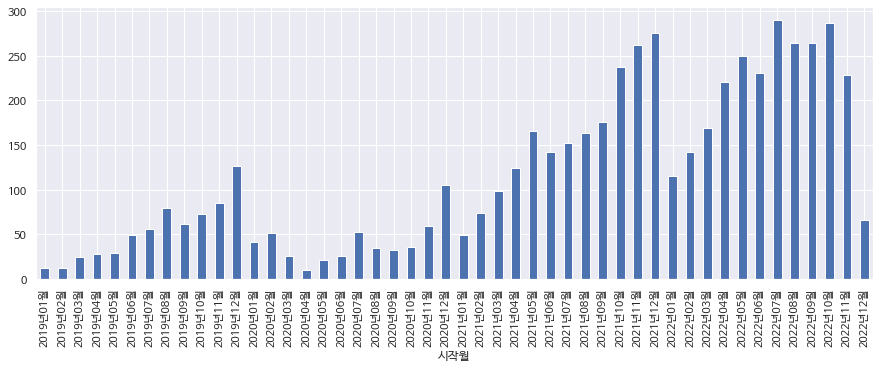

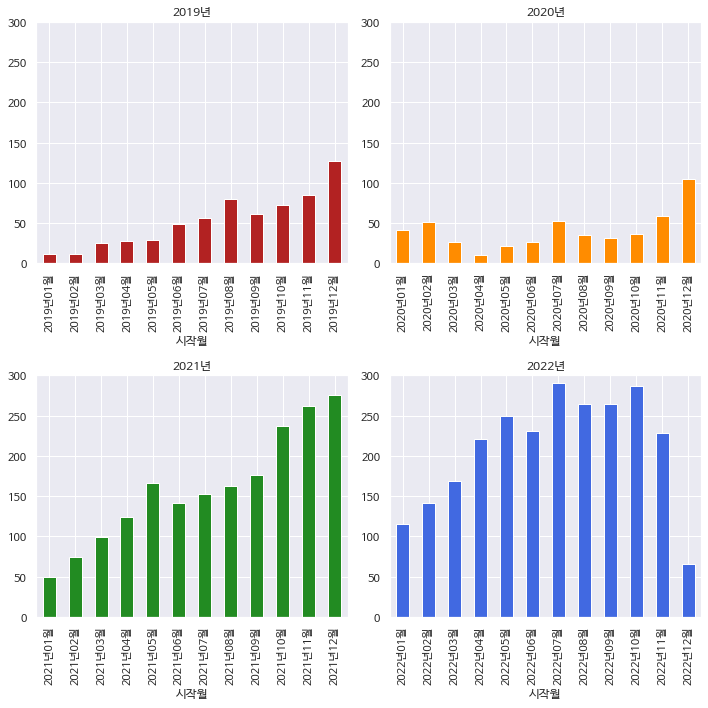

In [ ]:
# 월별 공연/행사 수 변화 시각화

plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 5))
busan_month_1.plot(kind='bar')
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
busan_2019.plot(kind='bar', color='firebrick')
plt.title('2019년')
plt.ylim([0, 300])

plt.subplot(2, 2, 2)
busan_2020.plot(kind='bar', color='darkorange')
plt.title('2020년')
plt.ylim([0, 300])

plt.subplot(2, 2, 3)
busan_2021.plot(kind='bar', color='forestgreen')
plt.title('2021년')
plt.ylim([0, 300])

plt.subplot(2, 2, 4)
busan_2022.plot(kind='bar', color='royalblue')
plt.title('2022년')
plt.ylim([0, 300])

plt.tight_layout()
plt.show()

2022년 11월 9일을 기준으로 데이터를 받아 2022년 11월 및 12월 데이터가 전부 입력되어 있지 않을 수 있어 분석이 이후의 데이터와 차이가 있을 수 있습니다.



**추론**

*   금년도를 제외하고 공연/행사가 12월에 제일 많습니다.
*   연초에 공연/행사의 수가 적은 것을 확인할 수 있습니다.
*   2019년은 코로나-19 바이러스가 확산전이지만 공연/행사의 수가 상대적으로 적은 것을 확인할 수 있습니다.
*   집합금지 명령이 시행된 2020년 4월에 공연/행사의 수가 현저히 적은 것을 확인할 수 있습니다.




### 2.3.2 분류 및 연도별 문화행사 수 시각화

#### 2.3.2.1 연도별로 분류에 따라 분리

In [ ]:
# 연도별로 분류에 따라 분리
def classification(year):
  temp = busan_month[busan_month['시작월'].str.startswith(year)].groupby(['시작월'])['분류'].value_counts()
  return temp

In [ ]:
# groupby 해체 
busan_2019_class = classification('2019').unstack()
busan_2020_class = classification('2020').unstack()
busan_2021_class = classification('2021').unstack()
busan_2022_class = classification('2022').unstack()

print(busan_2019_class)
print(busan_2020_class)
print(busan_2021_class)
print(busan_2022_class)

분류         뮤지컬    연극   전시   콘서트   클래식
시작월                                  
2019년01월   7.0   2.0  NaN   1.0   2.0
2019년02월   4.0   4.0  NaN   2.0   2.0
2019년03월   5.0  12.0  NaN   4.0   4.0
2019년04월  11.0   3.0  NaN   6.0   8.0
2019년05월  12.0   5.0  NaN   5.0   7.0
2019년06월  15.0   8.0  NaN  13.0  13.0
2019년07월  14.0  12.0  NaN  16.0  14.0
2019년08월  15.0  14.0  NaN  27.0  24.0
2019년09월   9.0   9.0  NaN  15.0  28.0
2019년10월  15.0  16.0  NaN  20.0  22.0
2019년11월  18.0  18.0  NaN  30.0  19.0
2019년12월  30.0  15.0  2.0  50.0  30.0
분류         무용   뮤지컬    연극  오페라    전시   콘서트   클래식
시작월                                             
2020년01월  NaN  13.0   4.0  NaN   4.0  12.0   8.0
2020년02월  NaN  15.0   2.0  NaN  10.0  14.0  10.0
2020년03월  NaN   9.0   4.0  NaN   3.0   7.0   3.0
2020년04월  NaN   6.0   2.0  NaN   1.0   NaN   1.0
2020년05월  1.0   4.0   4.0  NaN   3.0   5.0   4.0
2020년06월  5.0   3.0   2.0  NaN   2.0   5.0   9.0
2020년07월  8.0   5.0  11.0  2.0   9.0   6.0  12.0
2020년08월  3.0   5.0   6.0  

#### 2.3.2.2 NaN값 및 Index 채우기

In [ ]:
# Null 값 0으로 채우기
busan_2019_class = busan_2019_class.fillna(0.0)
busan_2020_class = busan_2020_class.fillna(0.0)
busan_2021_class = busan_2021_class.fillna(0.0)
busan_2022_class = busan_2022_class.fillna(0.0)

In [ ]:
busan_2019_class

분류,뮤지컬,연극,전시,콘서트,클래식
시작월,,,,,
2019년01월,7.0,2.0,0.0,1.0,2.0
2019년02월,4.0,4.0,0.0,2.0,2.0
2019년03월,5.0,12.0,0.0,4.0,4.0
2019년04월,11.0,3.0,0.0,6.0,8.0
2019년05월,12.0,5.0,0.0,5.0,7.0
2019년06월,15.0,8.0,0.0,13.0,13.0
2019년07월,14.0,12.0,0.0,16.0,14.0
2019년08월,15.0,14.0,0.0,27.0,24.0
2019년09월,9.0,9.0,0.0,15.0,28.0


In [ ]:
# 부족한 열 추가
busan_2019_class['무용'] = 0.0
busan_2019_class['오페라'] = 0.0

In [ ]:
# 열 위치 변경
busan_2019_class = busan_2019_class.reindex(columns=['무용','뮤지컬','연극','오페라','전시','콘서트','클래식'])
# busan_2019_class

#### 2.3.2.3 연도별 분류에 따른 시각화

In [ ]:
# bar_chart 생성
def bar_chart(data, year):
  x = [year+'년'+str(i+1)+'월' for i in range(12)]
  y1 = data['무용']
  y2 = data['뮤지컬']
  y3 = data['연극']
  y4 = data['오페라']
  y5 = data['전시']
  y6 = data['콘서트']
  y7 = data['클래식']

  plt.title(year+'년')
  plt.ylim([0, 300])
  plt.bar(x, y1)
  plt.bar(x, y2, bottom=y1)
  plt.bar(x, y3, bottom=y1+y2)
  plt.bar(x, y4, bottom=y1+y2+y3)
  plt.bar(x, y5, bottom=y1+y2+y3+y4)
  plt.bar(x, y6, bottom=y1+y2+y3+y4+y5)
  plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6)
  plt.xticks(rotation=45)

  plt.legend(['무용', '뮤지컬', '연극', '오페라', '전시', '콘서트', '클래식'])


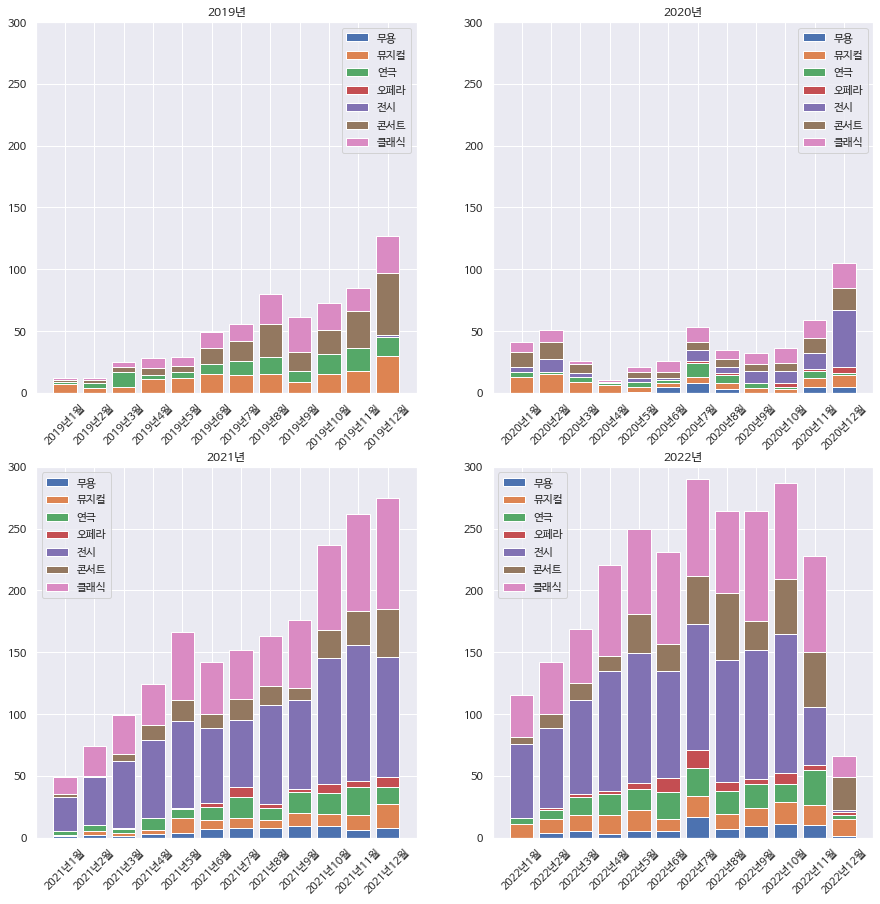

In [ ]:
# 월 및 분류별로 시각화
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
bar_chart(busan_2019_class,'2019')

plt.subplot(2, 2, 2)
bar_chart(busan_2020_class,'2020')

plt.subplot(2, 2, 3)
bar_chart(busan_2021_class,'2021')

plt.subplot(2, 2, 4)
bar_chart(busan_2022_class,'2022')

plt.show()

2022년 11월 9일을을 기준으로 데이터를 받아 2022년 11월 및 12월 데이터가 전부 입력되어 있지 않을 수 있어 분석이 이후의 데이터와 차이가 있을 수 있습니다.



**추론**

* 2019년에는 전시의 비율이 현저히 낮지만 2020년 12월부터 큰 비중을 차지하는 것을 확인할 수 있습니다.
* 금년도를 제외하고 콘서트의 비중이 연말에 늘어나는 것을 확인할 수 있습니다.
*   부산에서는 오페라를 볼 수 있는 기회가 흔치 않은 것을 확인할 수 있습니다.
*   2019년은 코로나-19 바이러스가 확산전이지만 공연/행사의 수가 상대적으로 적은 것을 확인할 수 있습니다.
*   2020년부터는 클래식 공연의 비율이 콘서트의 비율보다 높은 것을 확인할 수 있습니다.




### 2.3.3 분류별 변화 시각화

In [ ]:
# 분류마다 월별 groupby
busan_month_dance = dict(busan_month[busan_month['분류']=='무용'].copy().groupby('시작월').count()['제목'])
busan_month_musical = dict(busan_month[busan_month['분류']=='뮤지컬'].copy().groupby('시작월').count()['제목'])
busan_month_play = dict(busan_month[busan_month['분류']=='연극'].copy().groupby('시작월').count()['제목'])
busan_month_opera = dict(busan_month[busan_month['분류']=='오페라'].copy().groupby('시작월').count()['제목'])
busan_month_exhibition = dict(busan_month[busan_month['분류']=='전시'].copy().groupby('시작월').count()['제목'])
busan_month_concert = dict(busan_month[busan_month['분류']=='콘서트'].copy().groupby('시작월').count()['제목'])
busan_month_classic = dict(busan_month[busan_month['분류']=='클래식'].copy().groupby('시작월').count()['제목'])

# print(len(busan_month_dance))

In [ ]:
x = []
for i in range(2019,2023):
  for j in range(1,13):
    if j < 10:
      x.append(str(i)+'년0'+str(j)+'월')
    else:
      x.append(str(i)+'년'+str(j)+'월')

print(x)

['2019년01월', '2019년02월', '2019년03월', '2019년04월', '2019년05월', '2019년06월', '2019년07월', '2019년08월', '2019년09월', '2019년10월', '2019년11월', '2019년12월', '2020년01월', '2020년02월', '2020년03월', '2020년04월', '2020년05월', '2020년06월', '2020년07월', '2020년08월', '2020년09월', '2020년10월', '2020년11월', '2020년12월', '2021년01월', '2021년02월', '2021년03월', '2021년04월', '2021년05월', '2021년06월', '2021년07월', '2021년08월', '2021년09월', '2021년10월', '2021년11월', '2021년12월', '2022년01월', '2022년02월', '2022년03월', '2022년04월', '2022년05월', '2022년06월', '2022년07월', '2022년08월', '2022년09월', '2022년10월', '2022년11월', '2022년12월']


In [ ]:
# 빠진 연월 채우기
def checking_month(data):
  for i in x:
    if i not in data.keys():
      data[i] = 0

In [ ]:
checking_month(busan_month_dance)
checking_month(busan_month_opera)
checking_month(busan_month_exhibition)
checking_month(busan_month_concert)

# len(busan_month_exhibition)

In [ ]:
# key 정렬
busan_month_dance = dict(sorted(busan_month_dance.items()))
busan_month_opera = dict(sorted(busan_month_opera.items()))
busan_month_exhibition = dict(sorted(busan_month_exhibition.items()))
busan_month_concert = dict(sorted(busan_month_concert.items()))

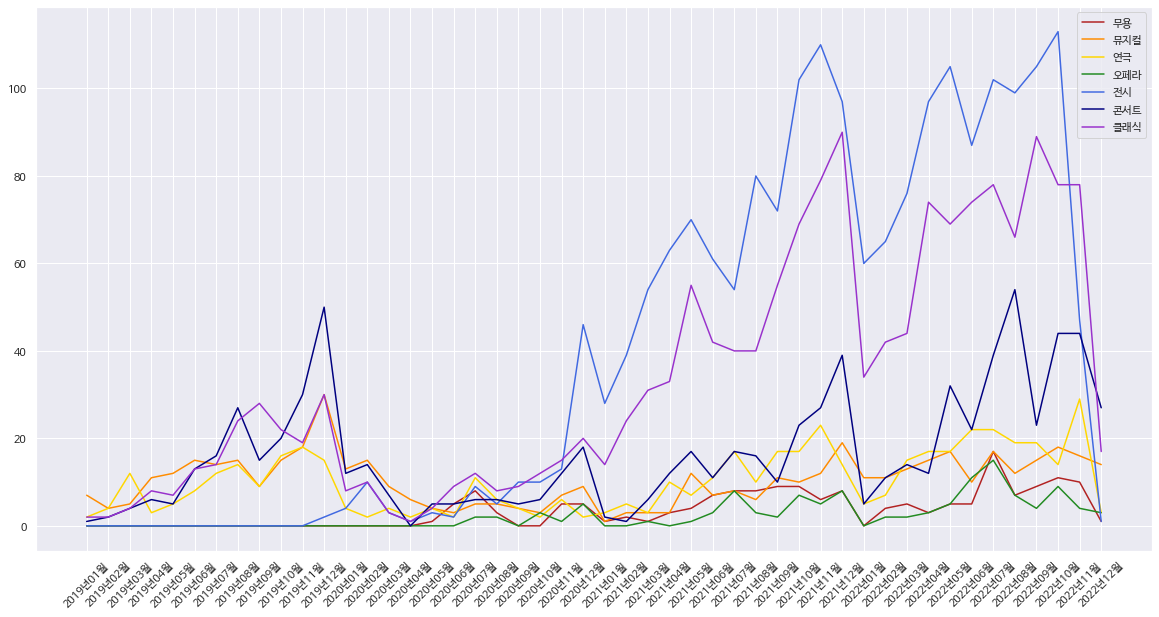

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams['axes.unicode_minus'] = False

plt.plot(x, list(busan_month_dance.values()), color='firebrick')
plt.plot(x, list(busan_month_musical.values()), color='darkorange')
plt.plot(x, list(busan_month_play.values()), color='gold')
plt.plot(x, list(busan_month_opera.values()), color='forestgreen')
plt.plot(x, list(busan_month_exhibition.values()), color='royalblue')
plt.plot(x, list(busan_month_concert.values()), color='navy')
plt.plot(x, list(busan_month_classic.values()), color='darkorchid')
plt.xticks(rotation=45)
plt.legend(['무용', '뮤지컬', '연극', '오페라', '전시', '콘서트', '클래식'])

plt.show()

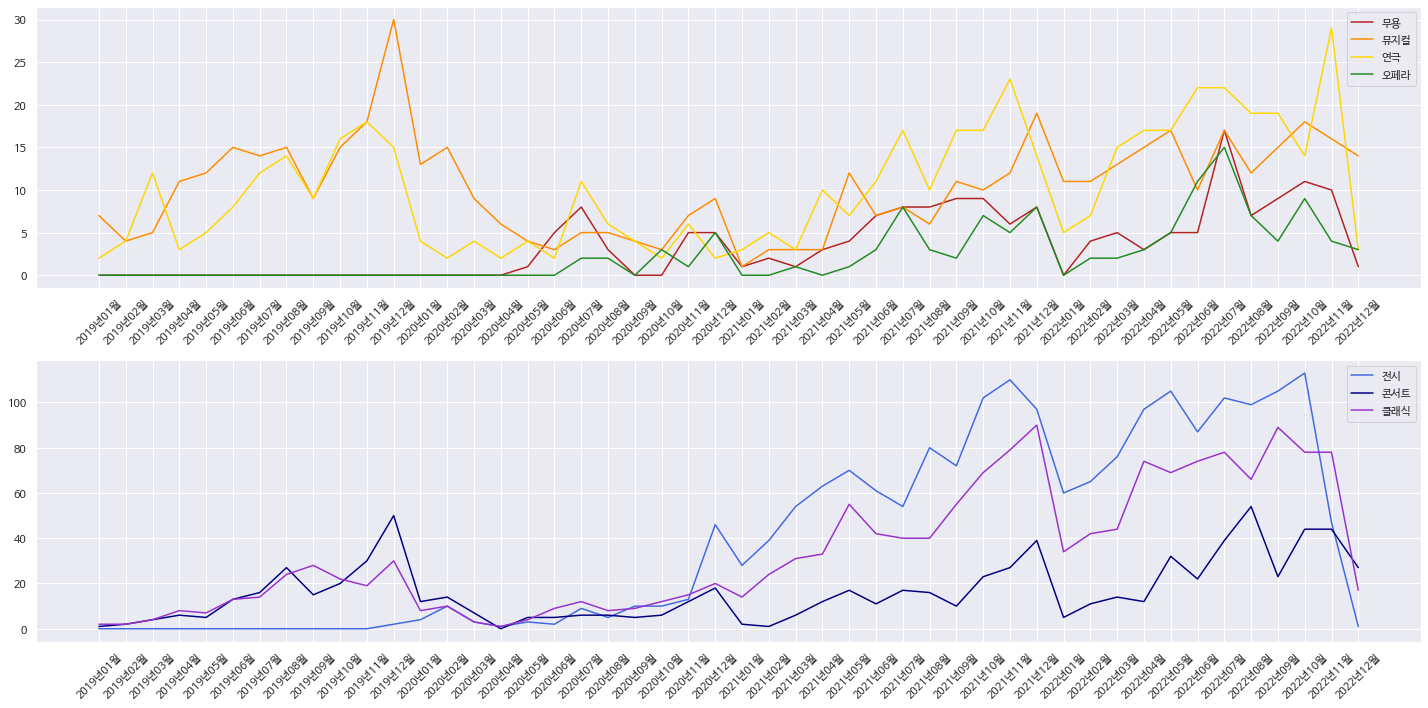

In [ ]:
# 두 그룹으로 분리
plt.figure(figsize=(20,10))
plt.rcParams['axes.unicode_minus'] = False

plt.subplot(2,1,1)
plt.plot(x, list(busan_month_dance.values()), color='firebrick')
plt.plot(x, list(busan_month_musical.values()), color='darkorange')
plt.plot(x, list(busan_month_play.values()), color='gold')
plt.plot(x, list(busan_month_opera.values()), color='forestgreen')
plt.xticks(rotation=45)
plt.legend(['무용', '뮤지컬', '연극', '오페라'])

plt.subplot(2,1,2)
plt.plot(x, list(busan_month_exhibition.values()), color='royalblue')
plt.plot(x, list(busan_month_concert.values()), color='navy')
plt.plot(x, list(busan_month_classic.values()), color='darkorchid')
plt.xticks(rotation=45)
plt.legend(['전시', '콘서트', '클래식'])

plt.tight_layout()
plt.show()

2022년 11월 9일을을 기준으로 데이터를 받아 2022년 11월 및 12월 데이터가 전부 입력되어 있지 않을 수 있어 분석이 이후의 데이터와 차이가 있을 수 있습니다.



**추론**

* 무용, 뮤지컬, 연극, 오페라 공연은 코로나-19 바이러스 확산 전후로 수가 크게 차이가 나지 않습니다.
*  전시 행사는 코로나-19 바이러스 확산 이후로 수가 늘기 시작하면서 2020년 12월을 기점으로 크게 증가하였습니다. 
*   코로나-19 바이러스 확산 시에는 모든 공연/행사의 수가 적은 것을 확인할 수 있습니다. 
*   2021년부터 전시 행사 및 클래식 공연의 수의 증감 추세가 유사한 것을 확인할 수 있습니다. 





## 2.4 결론



* 모든 공연과 행사의 수가 연말에 증가하고 연초에는 감소하는 경향이 있습니다.   
* 코로나-19 바이러스 확산 후에 공연/행사 수가 감소하였지만, 위드코로나 시행 후, **전시 행사와 클래식 공연은 크게 증가**하였습니다. 
*   무용과 오페라 공연은 코로나-19 바이러스 확산 뒤에 수가 점차 증가하였습니다.
* 뮤지컬, 연극, 콘서트의 수는 코로나-19 바이러스 확산 이전과 유사하게 증가하였습니다. 


> 가정: 코로나-19 바이러스 확산 후, 공연/행사의 수가 크게 감소하였을 것이다. 

> 결론
* 되려 코로나-19 바이러스 확산 전인 2019년에 공연/행사의 수가 적었으며, **확산 후에 크게 증가한 행사/공연이 있었습니다.**
* 수가 증가한 이유에 많은 요소들이 작용하였겠지만, 코로나-19 바이러스 확산으로 국내외여행이 줄어들면서 단시간 활동에 관심을 가졌을 수 있을 것으로 보입니다. 



## **3. 프로젝트 발전 가능성**



점차 공연/행사의 수가 증가할 것으로 예상되는데 코로나-19 바이러스 확산 전후의 시민들의 관심의 변화 또는 소비자층 조사를 통해 상관관계를 파악하여 문화/공연 관련 회사에서 마케팅의 바탕자료로 활용할 수 있을 것으로 생각합니다. 


## **4. 프로젝트 후기**



groupby 함수를 사용하면서 다른 방향으로 결과가 도출되거나 TypeError 등의 오류가 발생하였습니다. 

인터넷으로 찾아보면서 해결방안을 모색하여 코드를 수정하였습니다. 

이를 통해, 함수를 사용하기 전후의 타입을 확인하여 사전에 실수 또는 오류를 방지해야겠다는 생각을 하였습니다. 